<a href="https://colab.research.google.com/github/m-mahdavian/polarization/blob/main/polarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import openpyxl
from openpyxl import Workbook
from itertools import islice
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math

#Construction of Data Framework

In [6]:
workbook = openpyxl.load_workbook('polarization.xlsx')
worksheet = workbook.active

In [7]:
data = worksheet.values
cols = next(data)
data = list(data)
idx=islice(range(len(data)), 0, None, 1)
data = (islice(r, 0, None) for r in data)
df=pd.DataFrame(data, index=idx, columns=cols)

#Introduction of Wagner-Traud Equation (WTE)

In [8]:
def WTE(E, beta_a, beta_c, i_corr):
  return i_corr*((np.exp((E-E_corr)/beta_a)) - (np.exp((E-E_corr)/beta_c)))

#Data Fitting

Sample #1
beta_a = 59.5 mV/dec
beta_c = -41.8 mV/dec
E_corr = -459.0 mV
i_corr = 298.5 μA/cm²
R_p = 35.7 Ohm.cm²
---------------------
Sample #2
beta_a = 50.7 mV/dec
beta_c = -38.0 mV/dec
E_corr = -452.9 mV
i_corr = 215.6 μA/cm²
R_p = 43.8 Ohm.cm²
---------------------
Sample #3
beta_a = 96.9 mV/dec
beta_c = -50.4 mV/dec
E_corr = -485.2 mV
i_corr = 126.2 μA/cm²
R_p = 114.3 Ohm.cm²
---------------------
Sample #4
beta_a = 74.5 mV/dec
beta_c = -45.6 mV/dec
E_corr = -484.4 mV
i_corr = 102.7 μA/cm²
R_p = 119.8 Ohm.cm²
---------------------
Sample #5
beta_a = 87.6 mV/dec
beta_c = -56.1 mV/dec
E_corr = -474.0 mV
i_corr = 53.2 μA/cm²
R_p = 279.5 Ohm.cm²
---------------------
Sample #6
beta_a = 86.7 mV/dec
beta_c = -94.8 mV/dec
E_corr = -474.0 mV
i_corr = 23.8 μA/cm²
R_p = 827.8 Ohm.cm²
---------------------
Sample #7
beta_a = 92.7 mV/dec
beta_c = -149.1 mV/dec
E_corr = -467.3 mV
i_corr = 25.8 μA/cm²
R_p = 962.9 Ohm.cm²
---------------------
Sample #8
beta_a = 71.2 mV/dec
beta_c = -103.7 mV/de

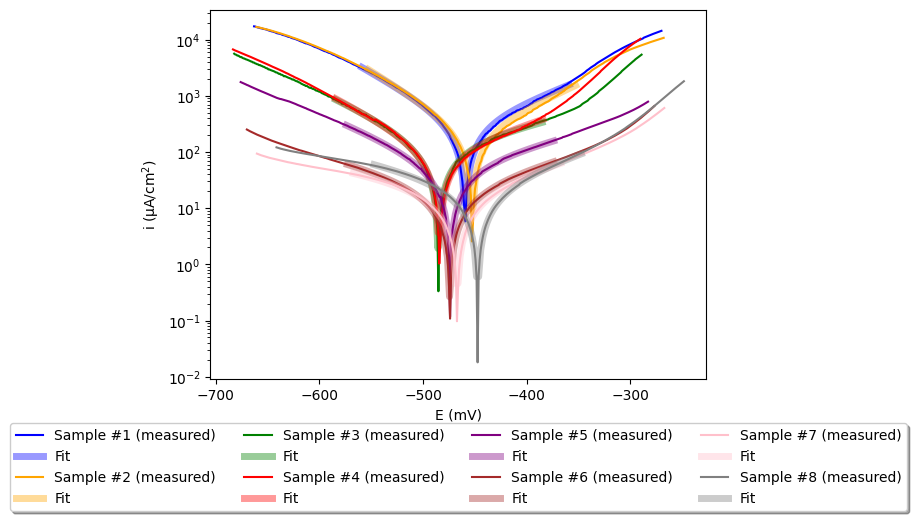

In [20]:
i=0
df_afit = pd.DataFrame()

plt.gca().set_prop_cycle(color=['blue', 'blue', 'orange', 'orange', 'green', 'green', 'red', 'red', 'purple', 'purple', 'brown', 'brown','pink','pink', 'gray','gray','olive','olive','cyan', 'cyan', 'navy','navy', 'violet', 'violet'])
while i<len(df.iloc[1, :]):
  selected = df.iloc[:, i:i+2]
  print(list(selected)[0])
  index_labels = selected.index[:1]
  selected_new = selected.drop(index_labels, axis=0).reset_index(inplace=False).drop('index', axis=1)
  selected_new.columns = ["E", "i"]

  abs_selected=selected_new.copy()
  abs_selected.iloc[:,1]=abs_selected.iloc[:,1].abs()
  row_min_i=abs_selected[abs_selected.i == abs_selected.i.min()]
  min_i=row_min_i.iloc[0,1]
  E_corr=row_min_i.iloc[0,0]
  df_bfit=selected_new[selected_new['E'].between(E_corr-100, E_corr+100)]
  df_bfit
  x_data = df_bfit["E"]
  y_data = df_bfit["i"]
  x_data = x_data.astype('float64')
  y_data = y_data.astype('float64')

  #Initial guess
  p0 = [100, -100, min_i*10]

  popt, pcov = curve_fit(WTE, x_data, y_data, p0)
  print("beta_a =", round(popt[0], 1), "mV/dec")
  print("beta_c =", round(popt[1], 1), "mV/dec")
  print("E_corr =", round(E_corr, 1), "mV")
  print("i_corr =", round(popt[2], 1), "μA/cm\u00b2")

  #Stern-Geary Equation
  R_p=-1000*(popt[0]*popt[1]/(popt[0]-popt[1]))/(2.3*popt[2])
  print("R_p =", round(R_p, 1), "Ohm.cm\u00b2")
  print("---------------------")

  lbl1=list(selected)[0]+" (measured)"
  plt.plot(selected_new['E'], selected_new['i'].abs(), label=lbl1)

  x_fit = np.linspace(min(x_data), max(x_data), 100)
  y_fit = WTE(x_fit, *popt)

  lbl2=list(selected)[0]+" E"
  lbl3=list(selected)[0]+" i_fit"

  df_i_list = [x_fit, y_fit]
  df_i = pd.DataFrame(df_i_list).transpose()
  df_i.columns = [lbl2, lbl3]
  df_afit = pd.concat([df_afit, df_i], axis=1).copy()

  plt.plot(x_fit, np.abs(y_fit), label="Fit", linewidth=5, alpha=0.4)
  plt.xlabel("E (mV)")
  plt.ylabel("i (μA/$\mathregular{cm^{2}}$)")
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=4)
  plt.yscale("log")
  i+=2

df_afit.to_excel("fitting_curves.xlsx",index=False)
